## Introduction

An Exploratory data analysis of the prices of Agricultural materials from 1990 - 2020

## Dataset Description

This dataset consists of prices and price in percentage change of some agricultural materials such as coarse wool, copra, cotton, fine wool, hard log, hard sawn wood, hide, plywood, rubber, soft log, soft sawn wood, and wood pulp.
the dataset was gotten from kaggle.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# first we load our data and print out a few lines to see what our data looks like,
#then we perform operations to inspect data
#types and look for instances of missing or possibly errant data.
df = pd.read_csv("agricultural_raw_material.csv")
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [8]:
#Exploring the dataset

df.shape

(361, 25)

In [9]:
df.info

<bound method DataFrame.info of       Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                      

In [10]:
#Checking Null Values of each column
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [11]:
df.dtypes

Month                            object
Coarse wool Price                object
Coarse wool price % Change       object
Copra Price                      object
Copra price % Change             object
Cotton Price                    float64
Cotton price % Change            object
Fine wool Price                  object
Fine wool price % Change         object
Hard log Price                  float64
Hard log price % Change          object
Hard sawnwood Price             float64
Hard sawnwood price % Change     object
Hide Price                      float64
Hide price % change              object
Plywood Price                   float64
Plywood price % Change           object
Rubber Price                    float64
Rubber price % Change            object
Softlog Price                   float64
Softlog price % Change           object
Soft sawnwood Price             float64
Soft sawnwood price % Change     object
Wood pulp Price                 float64
Wood pulp price % Change         object


What do we see here?
We see that price % change is deemed as an object. We will need to fix that by removing the "%" sign.
We also notice that the percentages of NaN values are significant (more than 5 %). We will drop the NaN values for those columns with 1 NaN value and as for the rest, we will replace them with median value.

In [14]:
# Replacing %, "," and "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

In [15]:
# Dropping rows with NaN values
df = df.dropna()

In [16]:
# Check to see if all NaN values are resolved
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [17]:
# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")

In [18]:
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [19]:
#formatting the datetime column and setting it as index for the dataset

df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)

In [20]:
# Indexing month
df = df.set_index('Month')

In [21]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


## Exploratory Analysis and Visualization

Here, we begin by importing matplotlib.pyplot and seaborn for our exploratory data analysis. a deeper look into the dataset.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

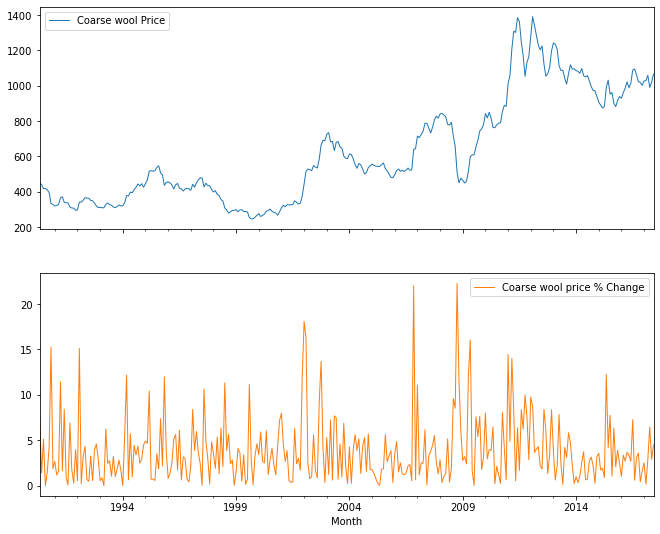

In [22]:
axes=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

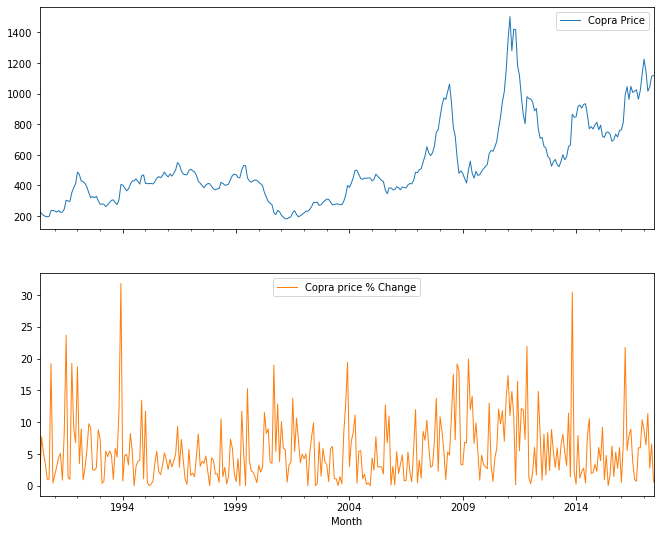

In [24]:
#Copra prices¶
axes = df[["Copra Price", "Copra price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

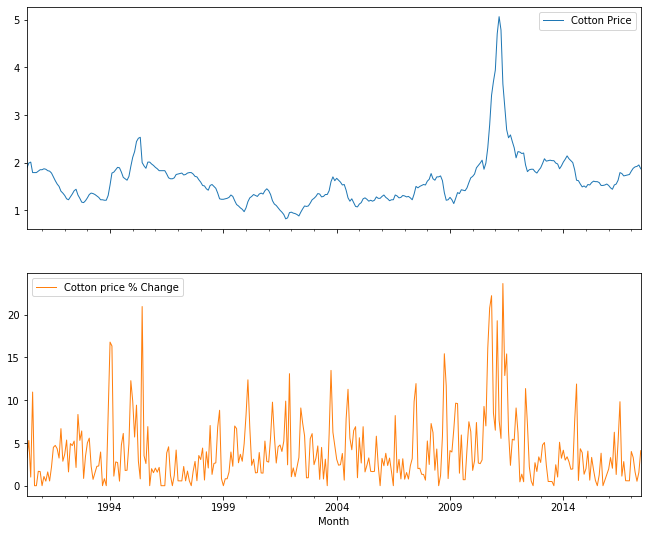

In [25]:
#Cotton prices
axes = df[["Cotton Price", "Cotton price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

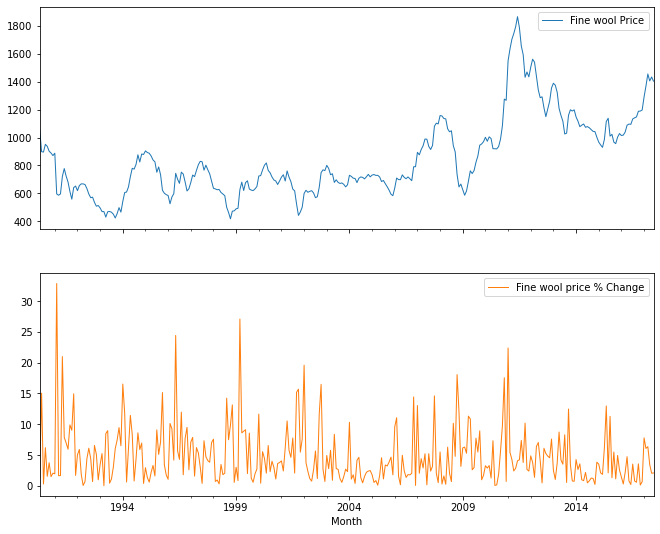

In [26]:
#Fine wool prices
axes = df[["Fine wool Price", "Fine wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

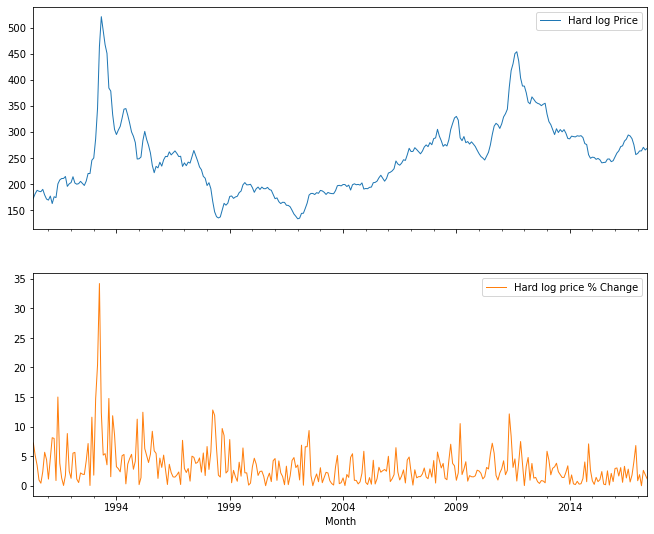

In [28]:
#Hard log price¶
axes = df[["Hard log Price", "Hard log price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

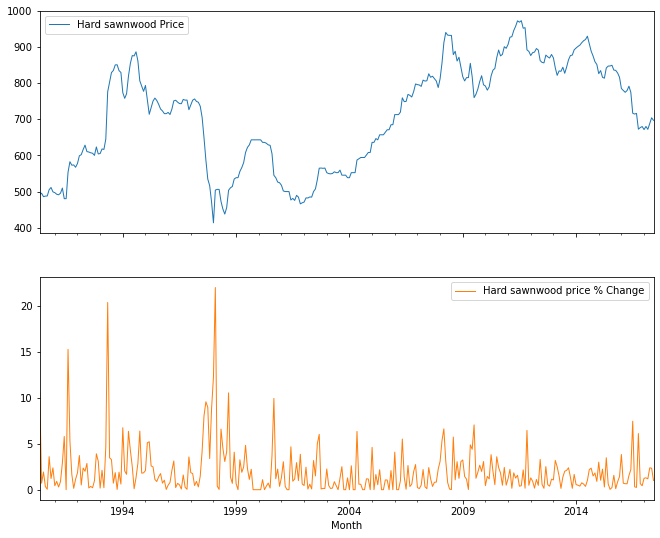

In [30]:
#Hard sawnwood price¶
axes = df[["Hard sawnwood Price", "Hard sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

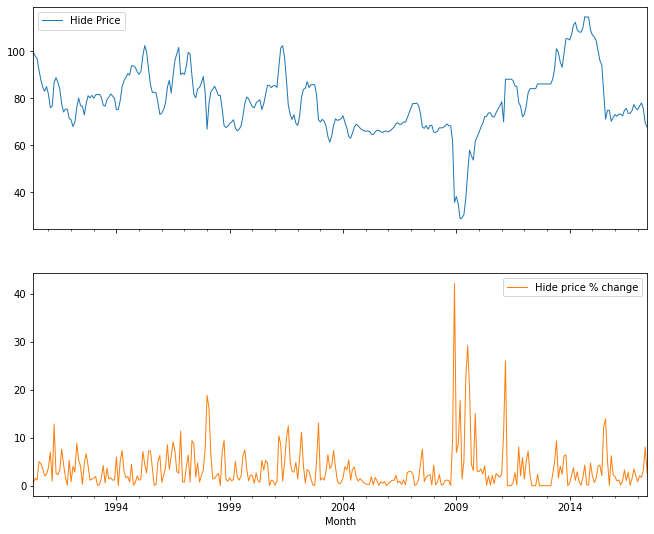

In [31]:
#Hide price¶
axes = df[["Hide Price", "Hide price % change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

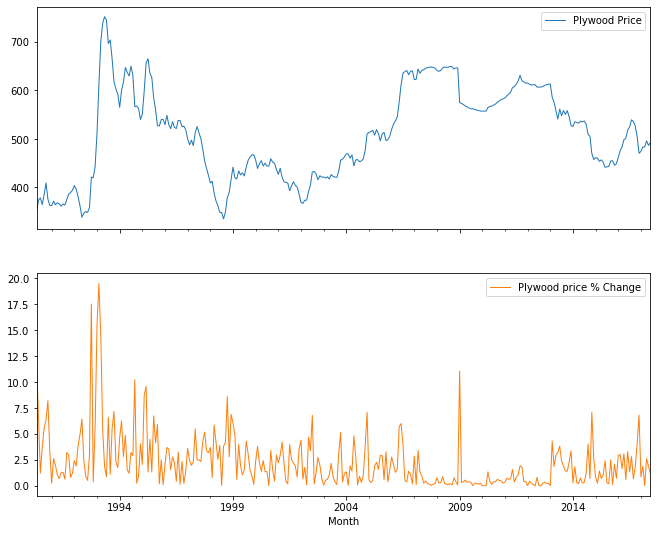

In [32]:
#Plywood¶
axes = df[["Plywood Price", "Plywood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

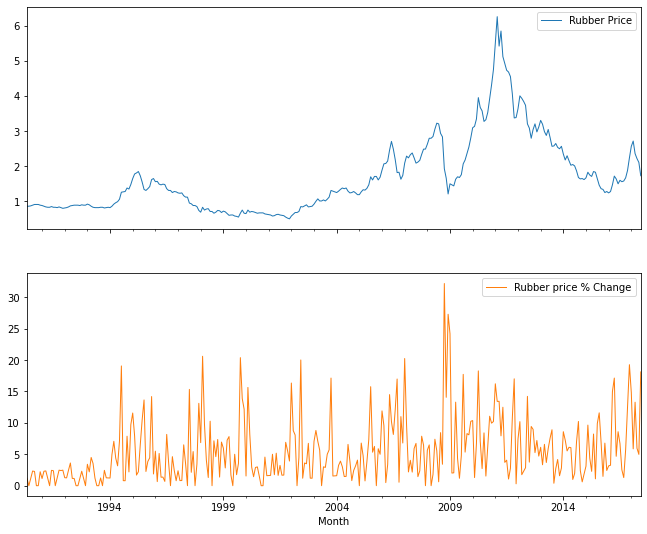

In [33]:
#Rubber prices
axes = df[["Rubber Price", "Rubber price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

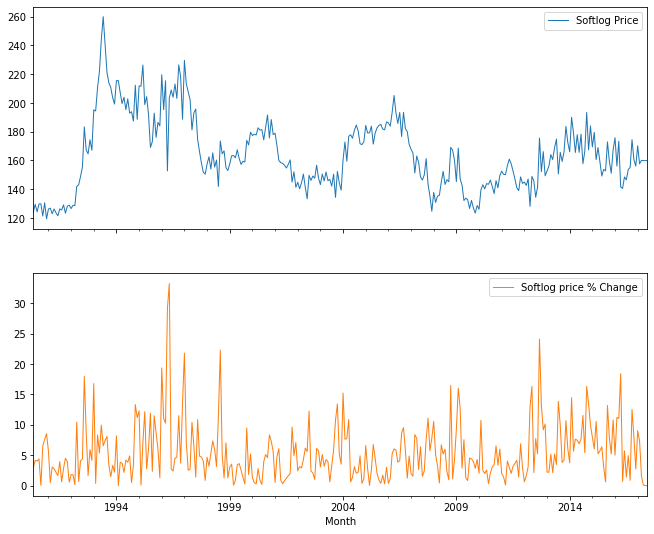

In [34]:
#Softlog prices
axes = df[["Softlog Price", "Softlog price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

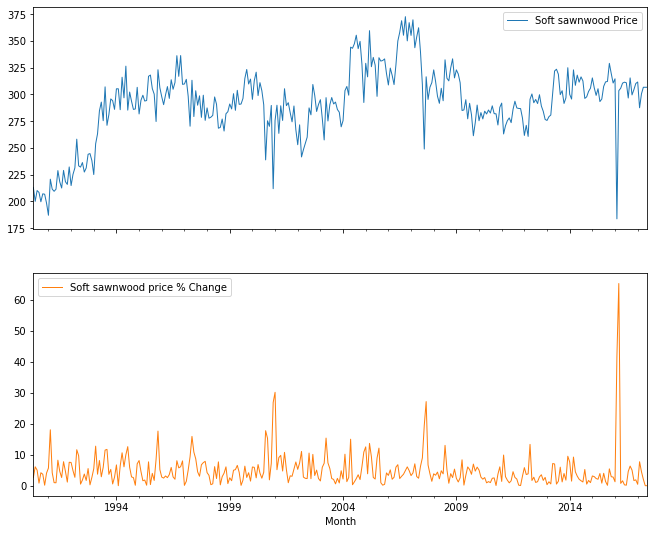

In [35]:
#Soft sawnwood prices¶
axes = df[["Soft sawnwood Price", "Soft sawnwood price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

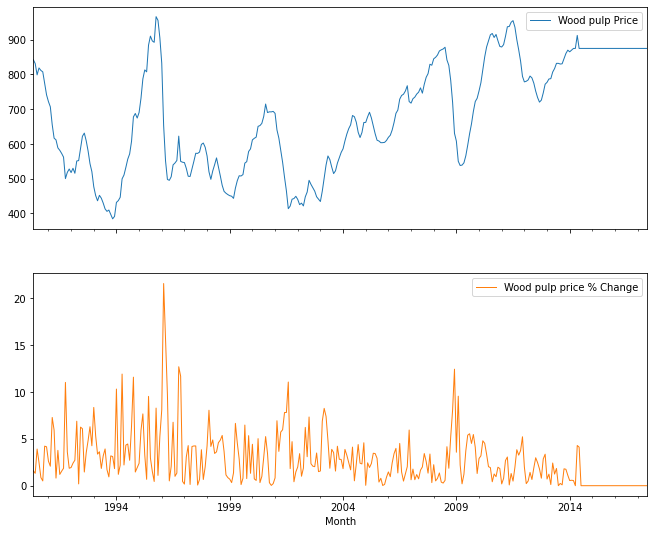

In [36]:
#Wood pulp
axes = df[["Wood pulp Price", "Wood pulp price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

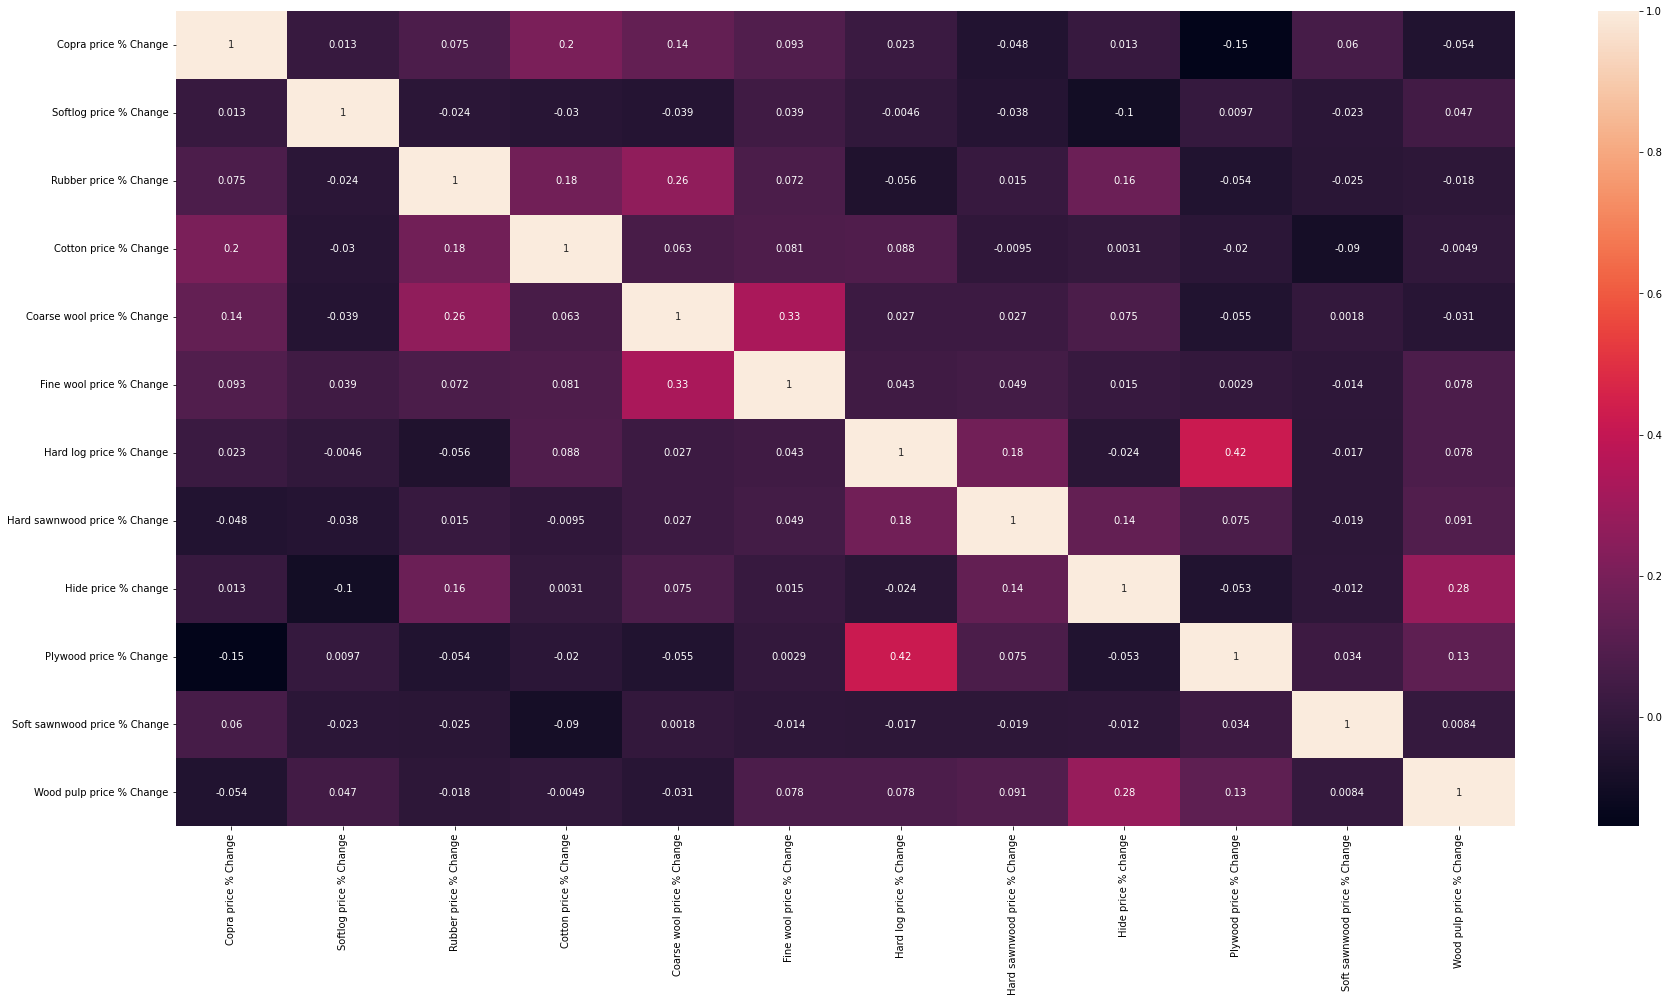

In [39]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From this plot, we can say that there is almost no relationship between the percentage change of raw-material prices.

The negative value implies that two variables are negatively correlated (this means that if one variable increases in value, then the other decreases)

However, a Zero value means that there is absolutely no relation between the variables.
Other wise the higher the value, the higher the chance of a better correlation.

## EDA continuous

Here, i will be looking further into finding out answers to soke of the questions that came my way during my analysis. 

## Q1: First find out the normal price change for each raw material

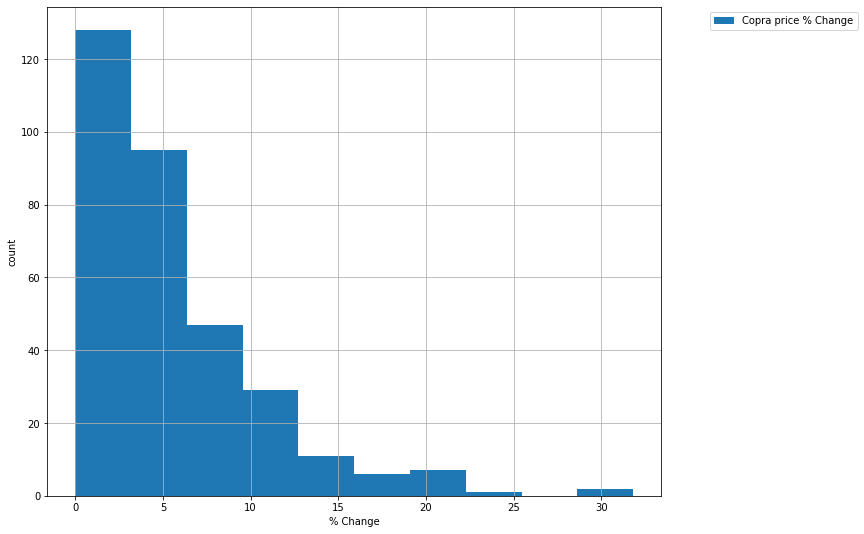

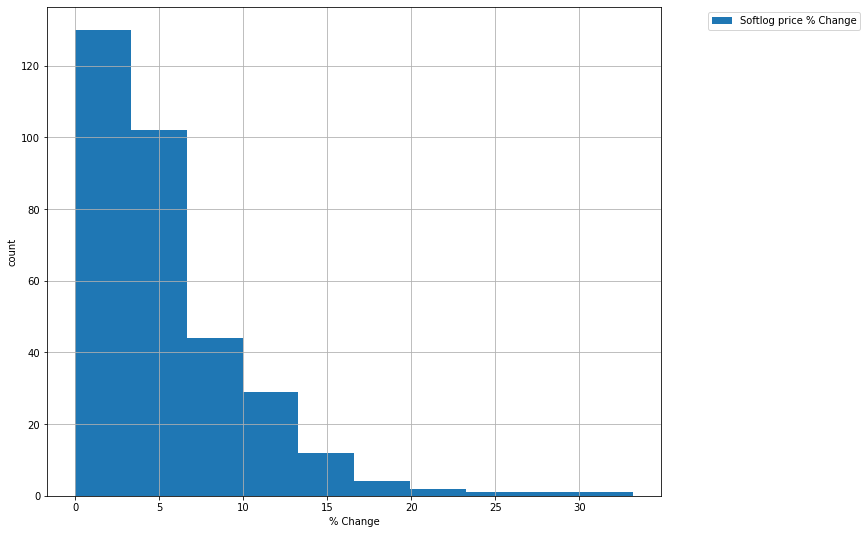

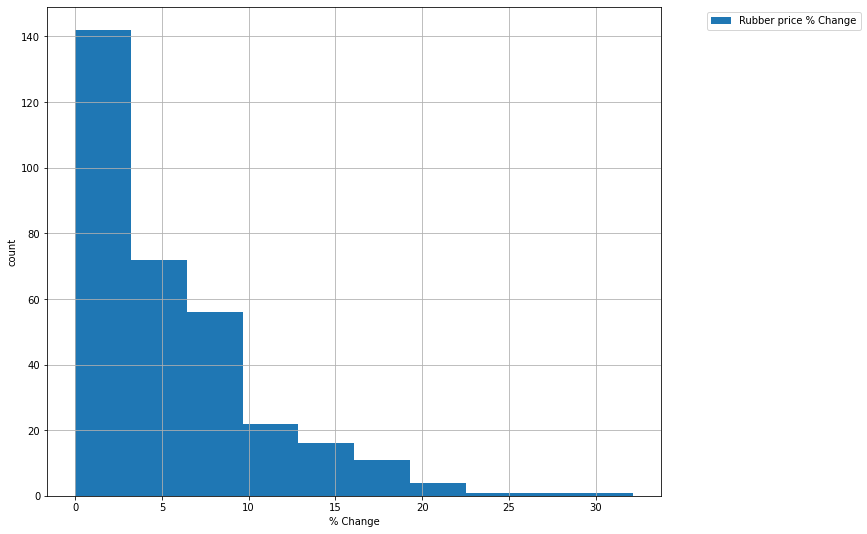

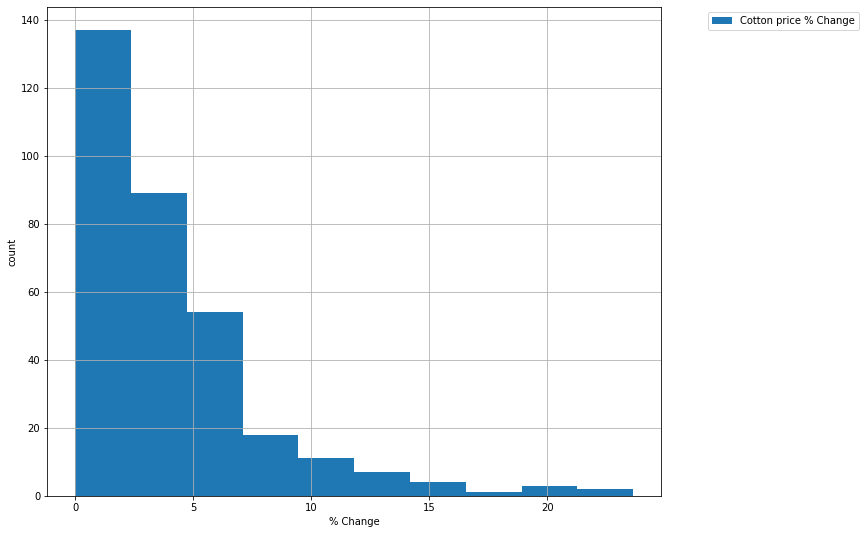

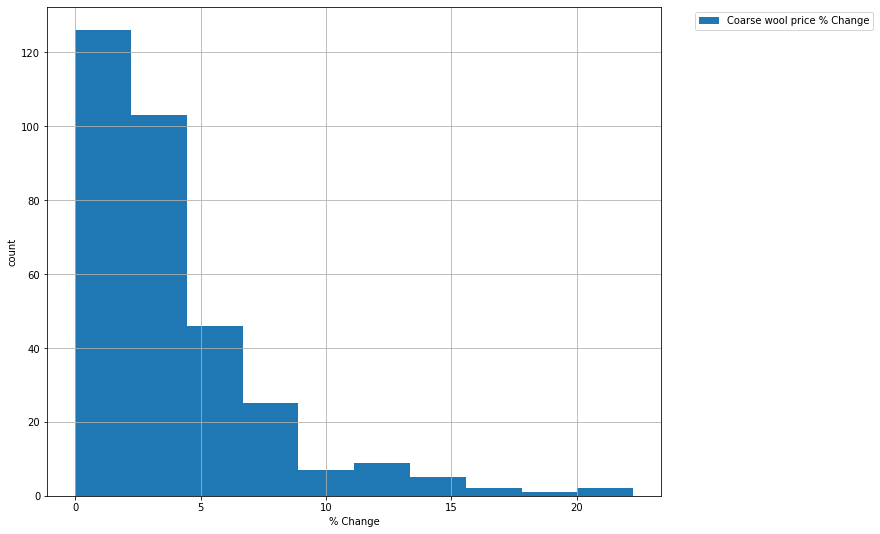

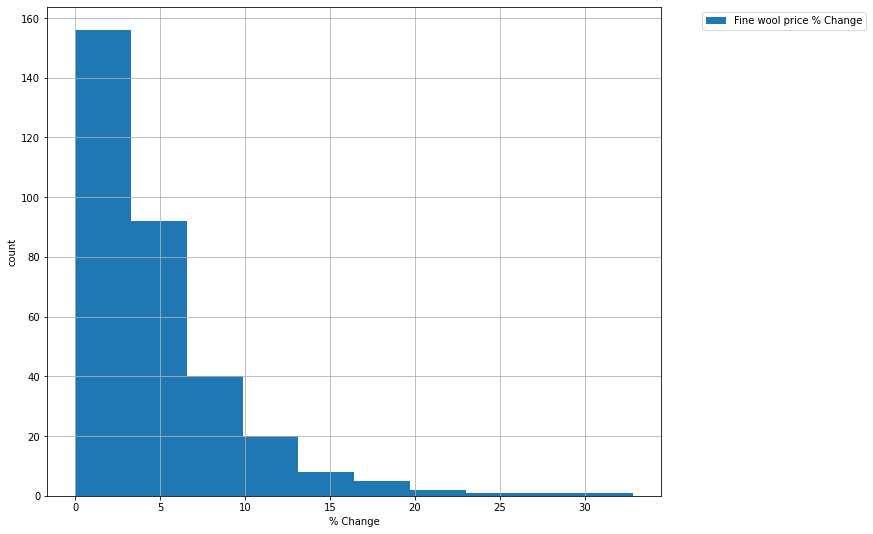

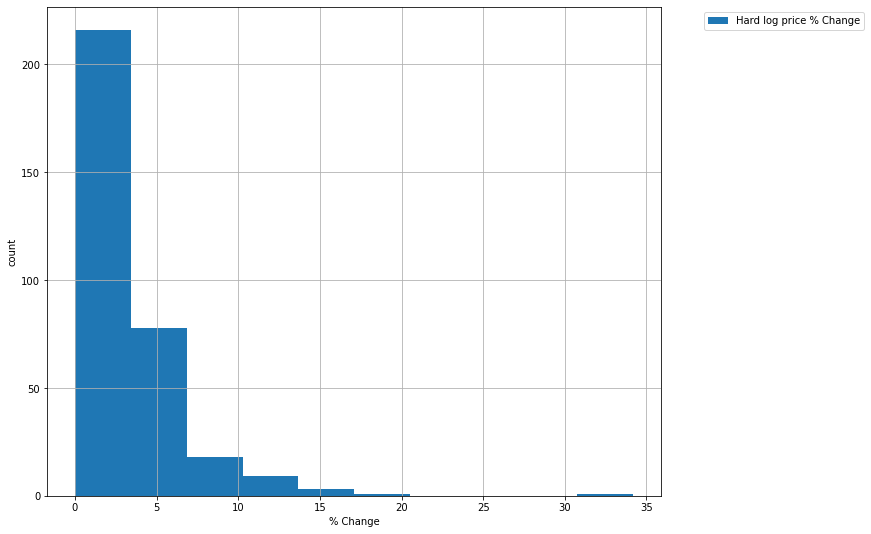

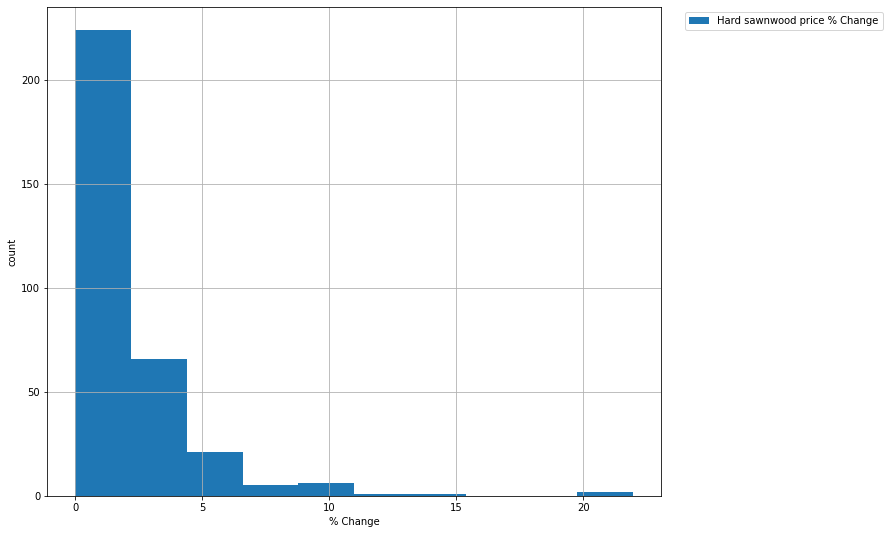

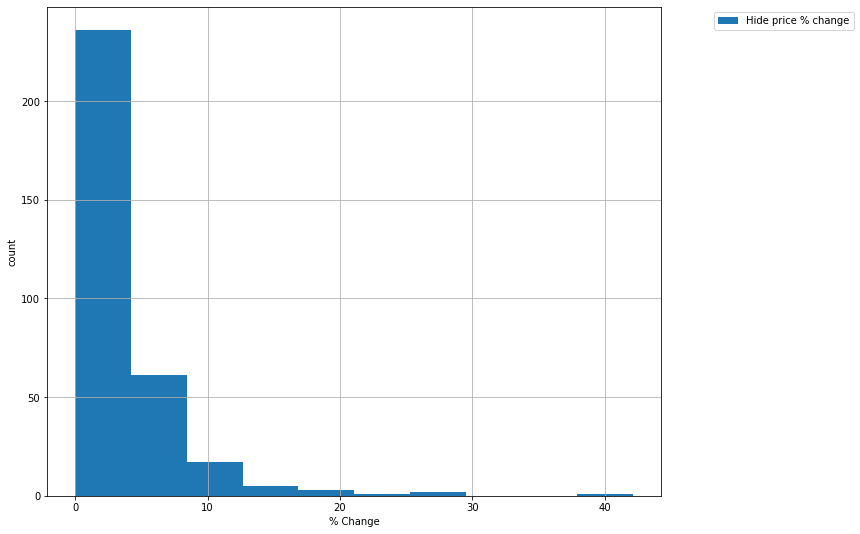

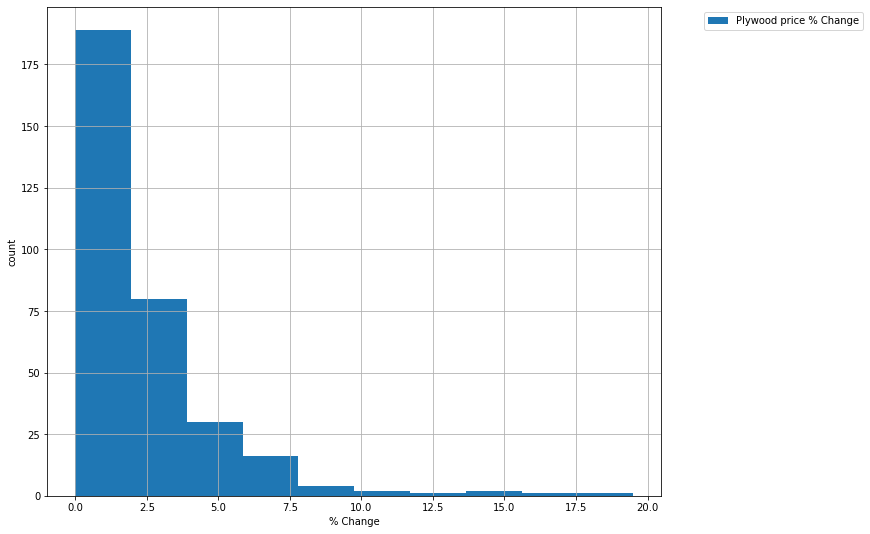

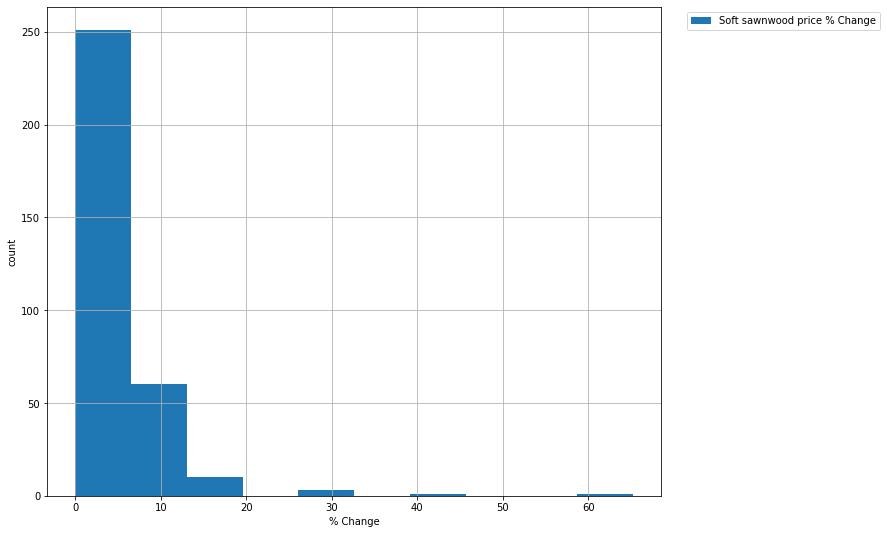

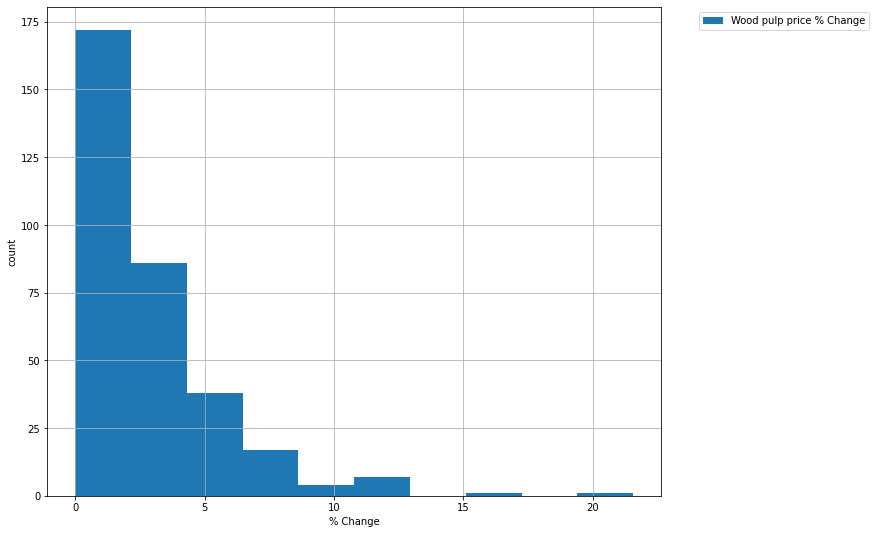

In [40]:
#df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)

changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

We can see that there's a very noticeably evidence that most raw-materials have an ideal frequent %change less than 5%

## Q2: What raw material has the lowest price over the years

Text(0.5, 0.98, 'Raw-Materials price comparision')

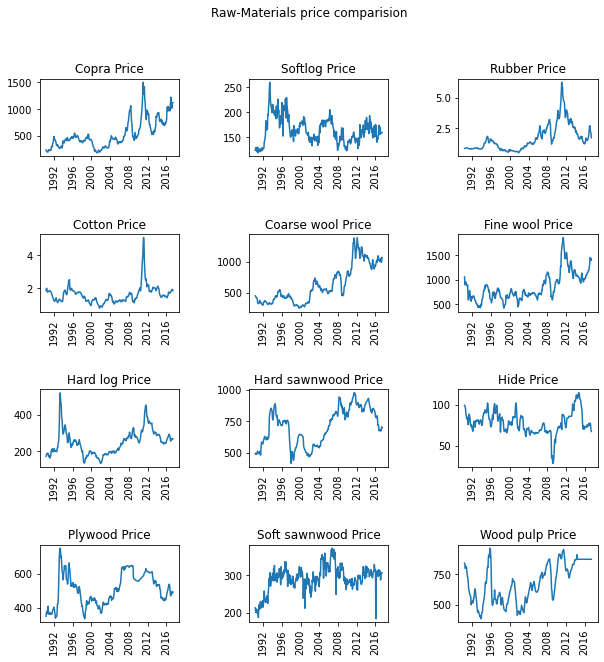

In [41]:
plt.figure(figsize=(10, 10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")

From this, we can see clearly well that both cotton and rubber are of lowest prices.

A further comparison sbetween them both should help us better understand which material price is lowest.

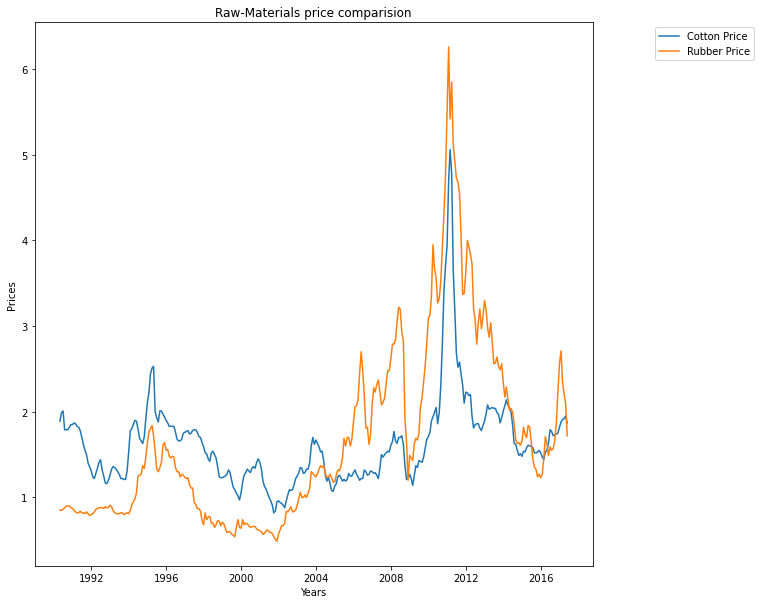

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

Our present comparison shows that cotton has the lowest price raw materials in the recent years, 
However, both cotton and rubber are low price agrocultural materials

### A further comparison of all material prices

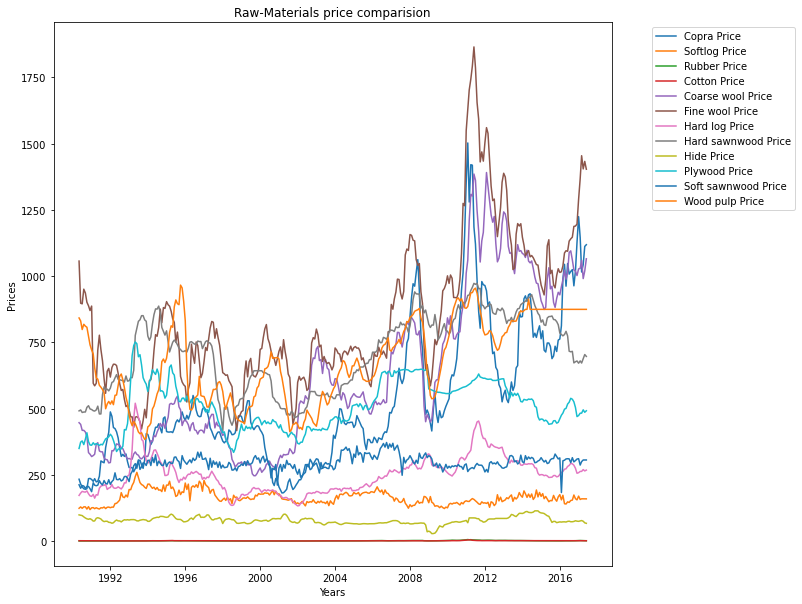

In [43]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

From the graphs above, we can be able to analyze raw materials into dtwo types according their price over years

LOW PRICE MATERIALS

-cotton,hide,softlog,Hard log,Soft sawnwood Price,rubber

HIGH PRICE MATERIALS

-coarse wool,copra,fine wool,hard sawnwood,woodpulp,plywood

## Q3: What raw material has the highest and lowest price % change

In [44]:
import random as random

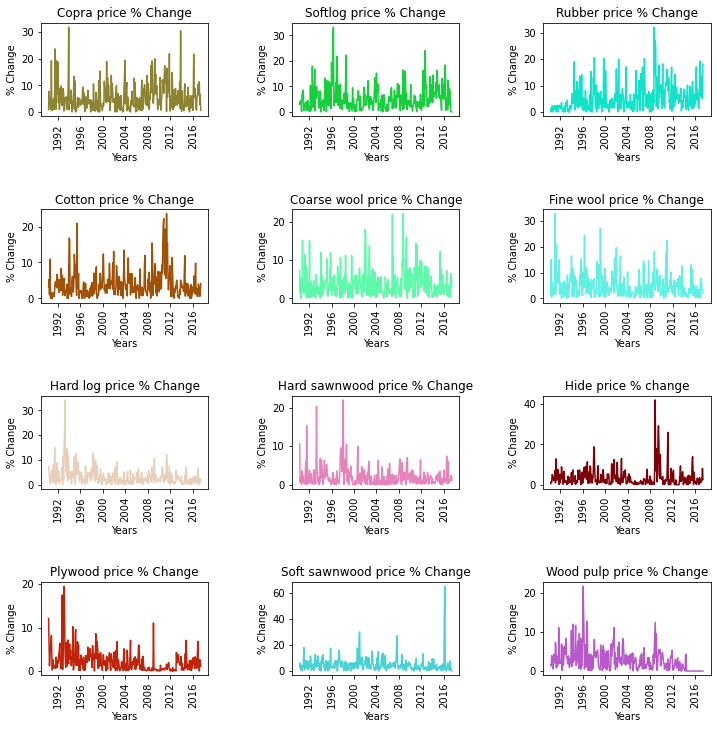

In [45]:
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
for i in range(len(changelist)):
   
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')
    #plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

Here, we can see the highest % change at more than 60 for "soft sawnwood" while the lowest % change is for "plywood" at less at 20



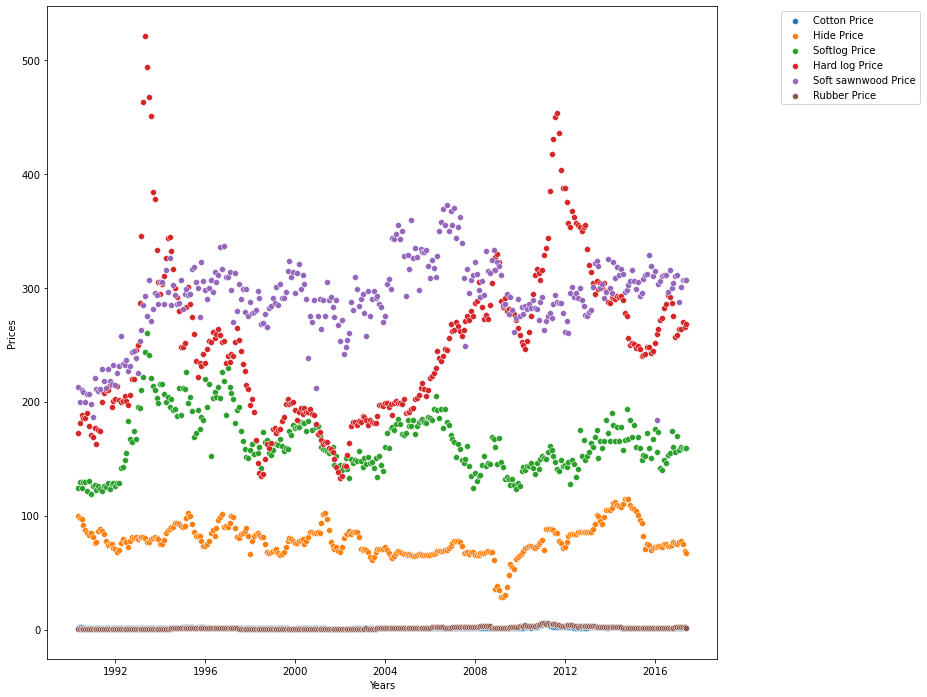

In [46]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
#plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]],x=df.index);
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

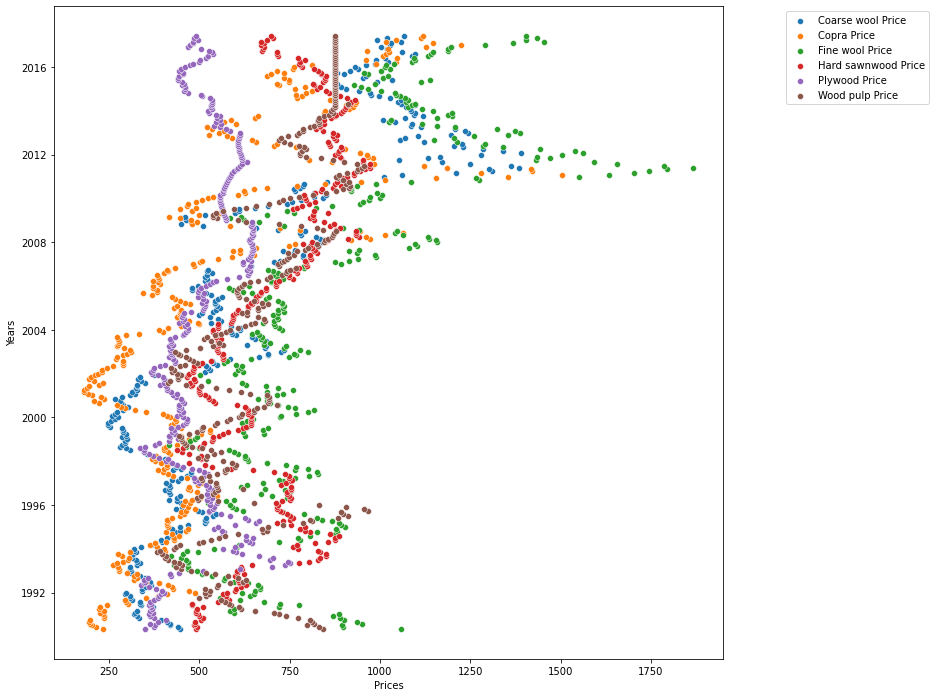

In [47]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
#lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Plywood Price']
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))

Price change is drastic for hard log price among low price range materials and Among high price materials it is Fine wool prices

## Q4: What is the price range of low priced raw-materials

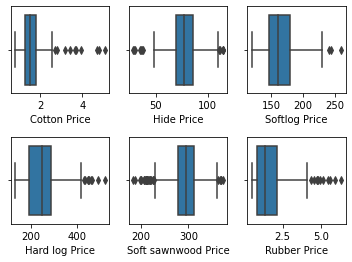

In [48]:
#plt.figure(figsize=(10, 10))
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

As already known, the BoxPlot gives us the distribution of data

Here from the plots, we can see some of the data distribution in the plot above incudes: 
1. Inter quartile range between Q3 and Q1 is at its minimum
2. first quartile (Q1) at median, 
3. Third quartile (Q3), at maximum.


## Conclusion and Recommedation
From my analysis, i was able to find out the high range and low range raw-materials according to their prices, the %Change of high and low  materials, as well as their relationships. 

I was also able to identify the the range of prices change over the years. Correlation between them using a heatmap

Furthermore, with a much deeper analysis into this, we could find out some more relationships between the raw materials in details. 
A further analysis could see us finding out the closest related raw materials.

In the future, a more deeper look and predictive analysis could see use being able to predict the prices of raw-materials by analysing the previous years, as well as predicting the range of price change and based on that we could plan our raw material usage in advance for the coming the year and figure out any alternative materials.